In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

pd.pandas.set_option('display.max_columns',None)

In [2]:
df_train = pd.read_csv('cc_train.csv')
df_test = pd.read_csv('cc_test.csv')

In [3]:
df_train.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,GENDER,QUALIFICATION,MARRIED,defaulter,Id
0,290000.0,50,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,199.0,1440.0,1017,3798.0,4898,199.0,1440.0,1017.0,3798.0,4898,5034.0,FEMALE,2,1.0,0,1
1,20000.0,49,0.0,0.0,0.0,0.0,NaN,0.0,19773.0,18459.0,19398.0,18561,18949.0,17426,1331.0,1270.0,633.0,655.0,759,547.0,FEMALE,2,3.0,1,2
2,230000.0,28,0.0,0.0,0.0,0.0,0.0,0.0,20356.0,21504.0,21729.0,23113,22936.0,23378,1676.0,1700.0,2007.0,1000.0,1000,1000.0,FEMALE,1,2.0,0,3
3,210000.0,31,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8600.0,0.0,4231.0,4221,4221.0,4483,0.0,4231.0,4221.0,4221.0,4483,4300.0,FEMALE,1,1.0,0,4
4,300000.0,24,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,-158.0,-158.0,-158.0,-158,142.0,92,0.0,0.0,0.0,300.0,100,100.0,MALE,2,2.0,0,5


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      18700 non-null  float64
 1   AGE            20000 non-null  int64  
 2   PAY_0          19344 non-null  float64
 3   PAY_2          18141 non-null  float64
 4   PAY_3          18751 non-null  float64
 5   PAY_4          19316 non-null  float64
 6   PAY_5          19323 non-null  float64
 7   PAY_6          18655 non-null  float64
 8   BILL_AMT1      18130 non-null  float64
 9   BILL_AMT2      18681 non-null  float64
 10  BILL_AMT3      19323 non-null  float64
 11  BILL_AMT4      20000 non-null  int64  
 12  BILL_AMT5      19318 non-null  float64
 13  BILL_AMT6      20000 non-null  int64  
 14  PAY_AMT1       18690 non-null  float64
 15  PAY_AMT2       18763 non-null  float64
 16  PAY_AMT3       18691 non-null  float64
 17  PAY_AMT4       19318 non-null  float64
 18  PAY_AM

In [5]:
df_train.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,QUALIFICATION,MARRIED,defaulter,Id
count,18700.000000,20000.000000,19344.000000,18141.000000,18751.000000,19316.000000,19323.000000,18655.000000,18130.000000,18681.000000,1.932300e+04,20000.000000,19318.000000,20000.000000,18690.000000,1.876300e+04,18691.000000,19318.000000,20000.000000,19312.000000,20000.000000,18674.000000,20000.000000,20000.000000
mean,167190.695187,34.917150,-0.021144,-0.138416,-0.168578,-0.221423,-0.269265,-0.294774,51094.638279,49179.558000,4.667550e+04,43086.380450,40213.220364,38770.647500,5610.364366,6.029688e+03,5201.018993,4812.899783,4795.568300,5355.859362,1.850500,1.554407,0.221100,10000.500000
std,129873.941189,9.339269,1.123974,1.195578,1.187314,1.163025,1.127610,1.142192,73272.959674,71434.725006,6.938112e+04,64216.028014,60863.800841,59711.066053,15997.312842,2.463616e+04,17373.761559,15379.152497,15485.675008,18808.218218,0.787198,0.522263,0.414998,5773.647028
min,10000.000000,18.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-15308.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3595.250000,3000.000000,2.635500e+03,2400.000000,1784.000000,1261.000000,1000.000000,8.400000e+02,390.000000,300.000000,255.750000,133.000000,1.000000,1.000000,0.000000,5000.750000
50%,140000.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22458.500000,21393.000000,2.002500e+04,18991.000000,18106.500000,16946.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,2.000000,2.000000,0.000000,10000.500000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66696.000000,63036.000000,5.948050e+04,53285.750000,49898.500000,49015.750000,5000.000000,5.000000e+03,4500.000000,4030.000000,4037.750000,4006.000000,2.000000,2.000000,0.000000,15000.250000
max,1000000.000000,74.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,426529.000000,528666.000000,6.000000,3.000000,1.000000,20000.000000


In [6]:
df_train.shape

(20000, 25)

In [7]:
df_train.isna().sum()

LIMIT_BAL        1300
AGE                 0
PAY_0             656
PAY_2            1859
PAY_3            1249
PAY_4             684
PAY_5             677
PAY_6            1345
BILL_AMT1        1870
BILL_AMT2        1319
BILL_AMT3         677
BILL_AMT4           0
BILL_AMT5         682
BILL_AMT6           0
PAY_AMT1         1310
PAY_AMT2         1237
PAY_AMT3         1309
PAY_AMT4          682
PAY_AMT5            0
PAY_AMT6          688
GENDER              0
QUALIFICATION       0
MARRIED          1326
defaulter           0
Id                  0
dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='Count'>

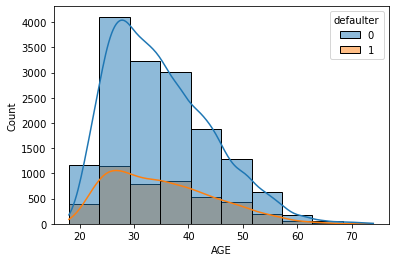

In [8]:
sb.histplot(data=df_train,x='AGE',bins=10,kde=True,hue='defaulter')

(array([7.370e+02, 1.332e+03, 1.091e+03, 8.580e+02, 5.330e+02, 3.060e+02,
        1.050e+02, 2.900e+01, 8.000e+00, 1.000e+00]),
 array([19. , 25.1, 31.2, 37.3, 43.4, 49.5, 55.6, 61.7, 67.8, 73.9, 80. ]),
 <BarContainer object of 10 artists>)

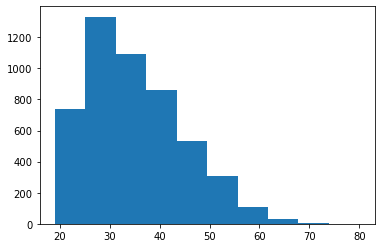

In [9]:
plt.hist(df_test['AGE'],bins=10)

<AxesSubplot:xlabel='AGE', ylabel='count'>

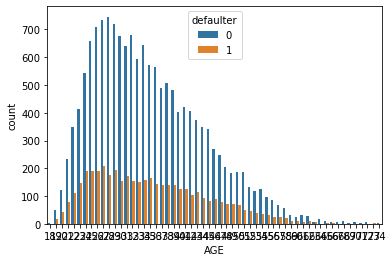

In [10]:
sb.countplot(data=df_train,x='AGE',hue='defaulter')

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

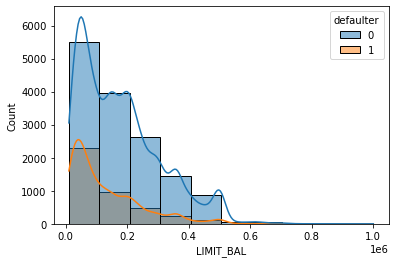

In [11]:
sb.histplot(data=df_train,x='LIMIT_BAL',bins=10,kde=True,hue='defaulter')

(array([7.804e+03, 4.931e+03, 3.136e+03, 1.705e+03, 9.890e+02, 7.800e+01,
        4.600e+01, 1.000e+01, 0.000e+00, 1.000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <BarContainer object of 10 artists>)

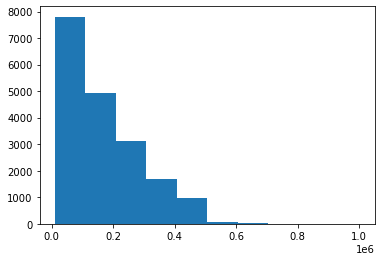

In [12]:
plt.hist(df_train['LIMIT_BAL'],bins=10)

<AxesSubplot:xlabel='GENDER', ylabel='Count'>

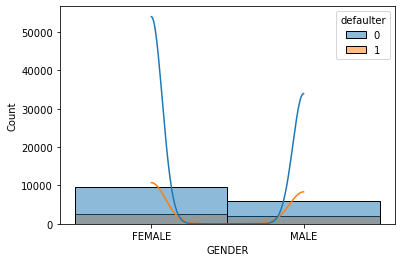

In [13]:
sb.histplot(data=df_train,x='GENDER',bins=10,kde=True,hue='defaulter')

(array([12053.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7947.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

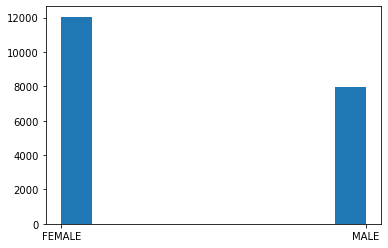

In [14]:
plt.hist(df_train['GENDER'])

<AxesSubplot:xlabel='GENDER', ylabel='count'>

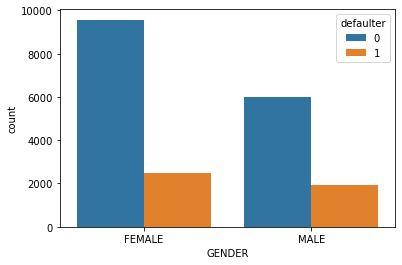

In [15]:
sb.countplot(data=df_train,x='GENDER',hue='defaulter')

<AxesSubplot:xlabel='MARRIED', ylabel='Count'>

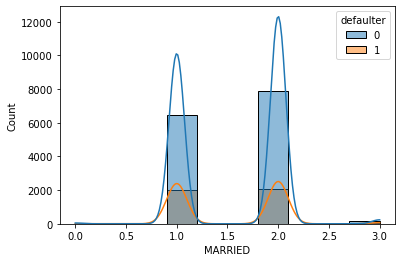

In [16]:
sb.histplot(data=df_train,x='MARRIED',bins=10,kde=True,hue='defaulter')

(array([  34.,    0.,    0., 8459.,    0.,    0., 9975.,    0.,    0.,
         206.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

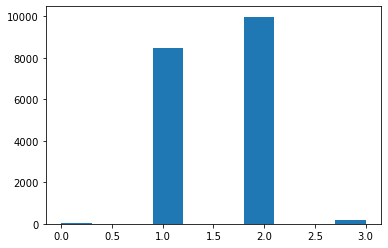

In [17]:
plt.hist(df_train['MARRIED'])

<AxesSubplot:xlabel='QUALIFICATION', ylabel='Count'>

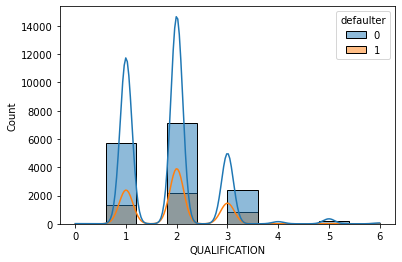

In [18]:
sb.histplot(data=df_train,x='QUALIFICATION',bins=10,kde=True,hue='defaulter')

(array([6.000e+00, 7.072e+03, 0.000e+00, 9.371e+03, 0.000e+00, 3.256e+03,
        8.100e+01, 0.000e+00, 1.800e+02, 3.400e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

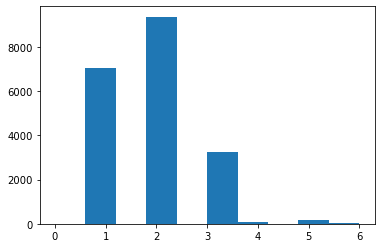

In [19]:
plt.hist(df_train['QUALIFICATION'])

#  imputation

In [20]:
num_cols = list(df_train.select_dtypes(exclude='object').columns)
num_cols.remove('Id')
num_cols.remove('defaulter')
cat_cols = list(df_train.select_dtypes(include='object').columns)

In [21]:
imputer_num=SimpleImputer(strategy='median')
imputer_cat=SimpleImputer(strategy='most_frequent')

imputer_num.fit(df_train[num_cols])
imputer_cat.fit(df_train[cat_cols])

df_train[num_cols]=imputer_num.transform(df_train[num_cols])
df_train[cat_cols]=imputer_cat.transform(df_train[cat_cols])

df_test[num_cols]=imputer_num.transform(df_test[num_cols])
df_test[cat_cols]=imputer_cat.transform(df_test[cat_cols])

(array([7.804e+03, 6.231e+03, 3.136e+03, 1.705e+03, 9.890e+02, 7.800e+01,
        4.600e+01, 1.000e+01, 0.000e+00, 1.000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <BarContainer object of 10 artists>)

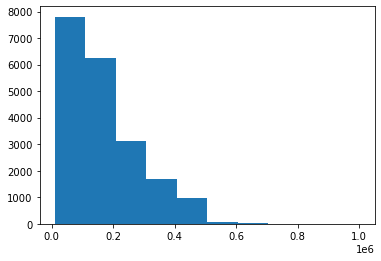

In [22]:
plt.hist(df_train['LIMIT_BAL'],bins=10)

In [23]:
df_test['AGE'].max()

80.0

# Binning

In [24]:
df_train=df_train[df_train['LIMIT_BAL'] <= 650000]

In [25]:
df_train['AGE']=pd.cut(df_train['AGE'],bins=[18.,23.6,29.2,34.8,40.4,46.,51.6,57.2,62.8,68.4,df_train['AGE'].max()],labels=[0,1,2,3,4,5,6,7,8,9],include_lowest=True)

In [26]:
df_test['AGE']=pd.cut(df_test['AGE'],bins=[18.,23.6,29.2,34.8,40.4,46.,51.6,57.2,62.8,68.4,df_test['AGE'].max()],labels=[0,1,2,3,4,5,6,7,8,9],include_lowest=True)

In [27]:
df_train['LIMIT_BAL']=pd.cut(df_train['LIMIT_BAL'],
                             bins=[10000.,109000.,208000.,307000.,406000.,505000.,
         604000.,703000.,802000.,901000.,1000000.],
                             labels=[0,1,2,3,4,5,6,7,8,9],
                             include_lowest=True)

In [28]:
df_test['LIMIT_BAL']=pd.cut(df_test['LIMIT_BAL'],
                             bins=[10000.,109000.,208000.,307000.,406000.,505000.,
         604000.,703000.,802000.,901000.,1000000.],
                             labels=[0,1,2,3,4,5,6,7,8,9],
                             include_lowest=True)

In [29]:
cat_cols.extend(['AGE','LIMIT_BAL'])

In [30]:
cat_cols

['GENDER', 'AGE', 'LIMIT_BAL']

# Feature Encoding

In [31]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe.fit(df_train[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [32]:
new_cols = list(ohe.get_feature_names_out())
new_cols

['GENDER_FEMALE',
 'GENDER_MALE',
 'AGE_0',
 'AGE_1',
 'AGE_2',
 'AGE_3',
 'AGE_4',
 'AGE_5',
 'AGE_6',
 'AGE_7',
 'AGE_8',
 'AGE_9',
 'LIMIT_BAL_0',
 'LIMIT_BAL_1',
 'LIMIT_BAL_2',
 'LIMIT_BAL_3',
 'LIMIT_BAL_4',
 'LIMIT_BAL_5',
 'LIMIT_BAL_6']

In [33]:
df_train[new_cols] = ohe.transform(df_train[cat_cols])
df_test[new_cols] = ohe.transform(df_test[cat_cols])

In [34]:
df_train.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,GENDER,QUALIFICATION,MARRIED,defaulter,Id,GENDER_FEMALE,GENDER_MALE,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,AGE_7,AGE_8,AGE_9,LIMIT_BAL_0,LIMIT_BAL_1,LIMIT_BAL_2,LIMIT_BAL_3,LIMIT_BAL_4,LIMIT_BAL_5,LIMIT_BAL_6
0,2,5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22458.5,199.0,1440.0,1017.0,3798.0,4898.0,199.0,1440.0,1017.0,3798.0,4898.0,5034.0,FEMALE,2.0,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,5,0.0,0.0,0.0,0.0,0.0,0.0,19773.0,18459.0,19398.0,18561.0,18949.0,17426.0,1331.0,1270.0,633.0,655.0,759.0,547.0,FEMALE,2.0,3.0,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,0.0,0.0,0.0,0.0,0.0,0.0,20356.0,21504.0,21729.0,23113.0,22936.0,23378.0,1676.0,1700.0,2007.0,1000.0,1000.0,1000.0,FEMALE,1.0,2.0,0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8600.0,0.0,4231.0,4221.0,4221.0,4483.0,0.0,4231.0,4221.0,4221.0,4483.0,4300.0,FEMALE,1.0,1.0,0,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,1,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,-158.0,-158.0,-158.0,-158.0,142.0,92.0,0.0,0.0,0.0,300.0,100.0,100.0,MALE,2.0,2.0,0,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Feature Selection

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19973 entries, 0 to 19999
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   LIMIT_BAL      19973 non-null  category
 1   AGE            19973 non-null  category
 2   PAY_0          19973 non-null  float64 
 3   PAY_2          19973 non-null  float64 
 4   PAY_3          19973 non-null  float64 
 5   PAY_4          19973 non-null  float64 
 6   PAY_5          19973 non-null  float64 
 7   PAY_6          19973 non-null  float64 
 8   BILL_AMT1      19973 non-null  float64 
 9   BILL_AMT2      19973 non-null  float64 
 10  BILL_AMT3      19973 non-null  float64 
 11  BILL_AMT4      19973 non-null  float64 
 12  BILL_AMT5      19973 non-null  float64 
 13  BILL_AMT6      19973 non-null  float64 
 14  PAY_AMT1       19973 non-null  float64 
 15  PAY_AMT2       19973 non-null  float64 
 16  PAY_AMT3       19973 non-null  float64 
 17  PAY_AMT4       19973 non-null  

In [36]:
col = list(df_train.corr()['defaulter'].index)
col.remove('defaulter')
col.remove('Id')
col

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'QUALIFICATION',
 'MARRIED',
 'GENDER_FEMALE',
 'GENDER_MALE',
 'AGE_0',
 'AGE_1',
 'AGE_2',
 'AGE_3',
 'AGE_4',
 'AGE_5',
 'AGE_6',
 'AGE_7',
 'AGE_8',
 'AGE_9',
 'LIMIT_BAL_0',
 'LIMIT_BAL_1',
 'LIMIT_BAL_2',
 'LIMIT_BAL_3',
 'LIMIT_BAL_4',
 'LIMIT_BAL_5',
 'LIMIT_BAL_6']

In [37]:
df_train.corr()['defaulter']

PAY_0            0.315088
PAY_2            0.249244
PAY_3            0.226398
PAY_4            0.210961
PAY_5            0.198627
PAY_6            0.176115
BILL_AMT1       -0.021515
BILL_AMT2       -0.024620
BILL_AMT3       -0.020855
BILL_AMT4       -0.019609
BILL_AMT5       -0.018531
BILL_AMT6       -0.017026
PAY_AMT1        -0.074647
PAY_AMT2        -0.058075
PAY_AMT3        -0.056362
PAY_AMT4        -0.061774
PAY_AMT5        -0.056498
PAY_AMT6        -0.056250
QUALIFICATION    0.030543
MARRIED         -0.023780
defaulter        1.000000
Id               0.006244
GENDER_FEMALE   -0.043591
GENDER_MALE      0.043591
AGE_0            0.023226
AGE_1           -0.003315
AGE_2           -0.028897
AGE_3           -0.001772
AGE_4            0.000476
AGE_5            0.017867
AGE_6            0.012448
AGE_7            0.006043
AGE_8            0.001246
AGE_9           -0.009208
LIMIT_BAL_0      0.138780
LIMIT_BAL_1     -0.028274
LIMIT_BAL_2     -0.066917
LIMIT_BAL_3     -0.058806
LIMIT_BAL_4 

In [38]:
final_col=list(df_train.corr()['defaulter'][(df_train.corr()['defaulter']>=0.01)|(df_train.corr()['defaulter']<=-0.01)].index)
final_col.remove('defaulter')
final_col

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'QUALIFICATION',
 'MARRIED',
 'GENDER_FEMALE',
 'GENDER_MALE',
 'AGE_0',
 'AGE_2',
 'AGE_5',
 'AGE_6',
 'LIMIT_BAL_0',
 'LIMIT_BAL_1',
 'LIMIT_BAL_2',
 'LIMIT_BAL_3',
 'LIMIT_BAL_4',
 'LIMIT_BAL_5',
 'LIMIT_BAL_6']

# Scaling

In [41]:
scaler=StandardScaler()

In [42]:
df_train[final_col] =scaler.fit_transform(df_train[final_col])

In [43]:
df_test[final_col] = scaler.transform(df_test[final_col])

# Model Building

In [44]:
x=df_train[final_col]
y= df_train['defaulter']

In [45]:
dict1={'n_estimators':[200,250],
       'max_depth':[8,9],
       'min_samples_leaf':[2,3],
       'min_samples_split':[2,3]}


In [46]:
grid_cv = GridSearchCV(RandomForestClassifier(), param_grid=dict1, cv=5,verbose=3)

In [47]:
grid_cv.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.816 total time=   9.4s
[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.821 total time=   9.0s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.820 total time=   8.8s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.812 total time=   8.7s
[CV 5/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.820 total time=   8.8s
[CV 1/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.817 total time=  10.9s
[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.819 total time=  11.0s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.820 total time=  11.0s
[CV

[CV 1/5] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.816 total time=   9.8s
[CV 2/5] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.820 total time=   9.6s
[CV 3/5] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.820 total time=   9.6s
[CV 4/5] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.812 total time=   9.9s
[CV 5/5] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.821 total time=  10.1s
[CV 1/5] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250;, score=0.816 total time=  12.2s
[CV 2/5] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250;, score=0.819 total time=  12.3s
[CV 3/5] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=250;, score=0.820 total time=  12.6s
[CV 4/5] END max_depth=9, min_samples_leaf=3, min_samples_split=

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 250]},
             verbose=3)

In [48]:
yp=grid_cv.predict(df_test[final_col])

In [49]:
df_submission = pd.DataFrame({'Id':df_test['Id'], 'defaulter':yp})

In [50]:
df_submission.to_csv('grid_cv_cr.csv', index=False)